# Identifying and Recommending Best Restaurants

**DESCRIPTION**

A restaurant consolidator is looking to revamp the B2C portal using intelligent automation tech. This requires a different matrix to identify the star restaurants and generate recommendations. To make sure an effective model can be achieved, it is important to understand the behavior of the data in hand.

There are 2 datasets, data and Country-Code. Dataset data has 19 attributes and Country-Code has two attributes.

You are required to determine certain matrices to identify the star restaurants and generate recommendations.

**Step to perform:**

   **Task-1 : Importing, Understanding, and Inspecting Data :**
   
   Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc

In [152]:
#import neccessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import dataset.

df = pd.read_excel(r'F:\Programing app\Simplilearn - Data Analyst Capstone project data\1585743394_datasets_marketing/data.xlsx')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [3]:
#keep original copy.

df_original = df.copy()

**1.1 - Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
print('Number of rows and columns:', df.shape)
print('Number of missing values :',df.isnull().sum())
print('Number of duplicates rows :', df.duplicated().sum())

Number of rows and columns: (9551, 19)
Number of missing values : Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Number of duplicates rows : 0


In the dataset, 

*there are 19 columns/attributes and 9551 rows.

*there is only one missing values in Restaurant name column and 9 missing values in cuisines column.

*No duplicated rows in the datset.

In the dataset, there are some values = 0. Check them

In [9]:
(df==0).sum()

Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                498
Latitude                 498
Cuisines                   0
Average Cost for two      18
Currency                   0
Has Table booking          0
Has Online delivery        0
Price range                0
Aggregate rating        2148
Rating color               0
Rating text                0
Votes                   1094
dtype: int64

In the data, some of the values are 0, it is also seems like missing.

**1.2 - Based on the findings from the previous questions, identify duplicates and remove them**

In [14]:
#drop rows which contain null values.
df = df.dropna()

In [15]:
df.shape

(9541, 19)

In [16]:
#missing values for lon_n_lat.
missing_city = df[(df.Longitude ==0)|(df.Latitude == 0) ].City.unique()
len(missing_city)

28

In [17]:
#filling missing values using city names
lat_n_long = df.groupby('City').agg('mean')[['Latitude','Longitude']].loc[missing_city]
missing_city_loc = {x:tuple(lat_n_long.loc[x]) for x in missing_city}
((df.Latitude == 0) | (df.Longitude == 0)).sum()

499

In [18]:
len(lat_n_long)

28

In [20]:
for i in df.index:
    if (df.loc[i,'Latitude'] == 0) or (df.loc[i , 'Longitude'] == 0):
        city = df.loc[i , 'City']
        lat, long = missing_city_loc[city]
        df.loc[i,'Latitude'] = lat
        df.loc[i,'Longitude'] = long

In [21]:
#all the zeros in the missing long_n_lat are filled.
((df.Latitude == 0) | (df.Longitude == 0)).sum()

0

**Task 2: Performing EDA:**

In [25]:
country_code =  pd.read_excel(r'F:\Programing app\Simplilearn - Data Analyst Capstone project data\1585743394_datasets_marketing/Country-code.xlsx')
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [26]:
#replace columns shape by under_score.
df.columns= df.columns.str.replace(' ','_')
country_code.columns = country_code.columns.str.replace(' ','_')

In [28]:
df = pd.merge(df, country_code, on='Country_Code')

In [29]:
df.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


**2.1 - Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants**

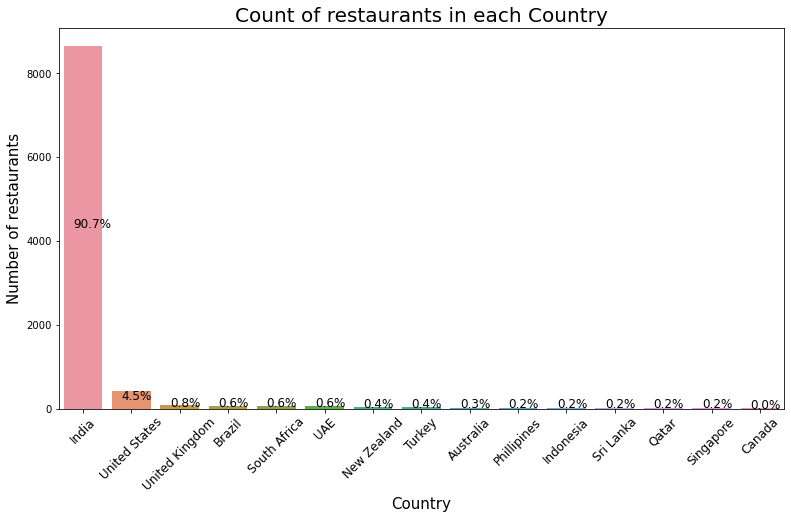

In [40]:
plt.figure(figsize=(13,7))
vc = pd.DataFrame(df.Country.value_counts()).rename({'Country':'Freq'}, axis=1)
vc['Perc'] = (vc.Freq/vc.Freq.sum()*100).round(1)

sns.countplot(x='Country', data=df , order=vc.index)

for i in range(len(vc)):
    plt.annotate(str(vc.Perc[i]) +'%', xy = (i -0.2, int(vc.Freq[i]/2)), fontsize=12)
plt.xticks(size=12, rotation=45)
plt.xlabel('Country', size = 15)
plt.ylabel('Number of restaurants', size = 15)
plt.title('Count of restaurants in each Country', size=20)
plt.show()    

<ipython-input-42-c3e017e556f0>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vc = pd.Series()


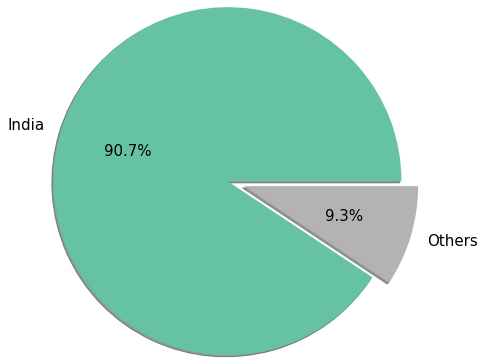

In [42]:
vc = pd.Series()
vc['India'] = len(df[df.Country == 'India'])
vc['Others'] = len(df[df.Country != 'India'])
vc.plot.pie(radius = 2,autopct = '%1.1f%%' , textprops = {'size':15 }, explode= [0.1,0.1], shadow = True, cmap ='Set2')
plt.xticks(size = 12, rotation = 10)
plt.ylabel('')
plt.show()

in the overall data Appx.91% of data contains India's market.
So from now drop others country data and focus only on India's data.

In [46]:
df = df[df.Country=='India']
df.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
21,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000,Indian Rupees(Rs.),Yes,No,4,4.0,Green,Very Good,145,India
22,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,Indian Rupees(Rs.),No,No,4,4.1,Green,Very Good,188,India
23,2742,Bukhara - ITC Maurya,1,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500,Indian Rupees(Rs.),No,No,4,4.4,Green,Very Good,2826,India
24,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000,Indian Rupees(Rs.),Yes,No,4,3.2,Orange,Average,12,India
25,2724,1911 - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,Indian Rupees(Rs.),Yes,No,4,3.9,Yellow,Good,272,India


In [47]:
print("All unique cities of restaurants in India")
df.City.unique()

All unique cities of restaurants in India


array(['New Delhi', 'Gurgaon', 'Agra', 'Noida', 'Kanpur', 'Ghaziabad',
       'Jaipur', 'Bangalore', 'Chandigarh', 'Pune', 'Chennai', 'Goa',
       'Hyderabad', 'Indore', 'Lucknow', 'Ludhiana', 'Panchkula',
       'Ranchi', 'Faridabad', 'Kolkata', 'Ahmedabad', 'Aurangabad',
       'Bhopal', 'Mysore', 'Vizag', 'Guwahati', 'Dehradun', 'Mangalore',
       'Nagpur', 'Patna', 'Bhubaneshwar', 'Coimbatore', 'Kochi', 'Mumbai',
       'Nashik', 'Puducherry', 'Surat', 'Vadodara', 'Amritsar',
       'Varanasi', 'Allahabad', 'Secunderabad', 'Mohali'], dtype=object)

In [48]:
print("Count of restaurants at unique Cities")
City_Count=df['City'].value_counts().sort_values(ascending=True)
City_Count

Count of restaurants at unique Cities


Mohali             1
Panchkula          1
Secunderabad       2
Chandigarh        18
Hyderabad         18
Vizag             20
Kochi             20
Varanasi          20
Chennai           20
Ahmedabad         20
Surat             20
Ludhiana          20
Mysore            20
Nashik            20
Coimbatore        20
Jaipur            20
Mumbai            20
Pune              20
Indore            20
Dehradun          20
Vadodara          20
Goa               20
Patna             20
Bhopal            20
Agra              20
Allahabad         20
Kanpur            20
Bangalore         20
Puducherry        20
Kolkata           20
Nagpur            20
Mangalore         20
Aurangabad        20
Ranchi            20
Guwahati          21
Lucknow           21
Amritsar          21
Bhubaneshwar      21
Ghaziabad         25
Faridabad        251
Noida           1080
Gurgaon         1118
New Delhi       5473
Name: City, dtype: int64

In [50]:
#lets check max count
print("Maximum number of Resaturants Present at:")
count_max=max(City_Count)
for x,y in City_Count.items():
    if(y==count_max):
        print(x)

Maximum number of Resaturants Present at:
New Delhi


In [52]:
#lets check min count
print("Minimum number of Resaturants Present at:")
count_min=min(City_Count)
for x,y in City_Count.items():
    if(y==count_min):
        print(x)

Minimum number of Resaturants Present at:
Mohali
Panchkula


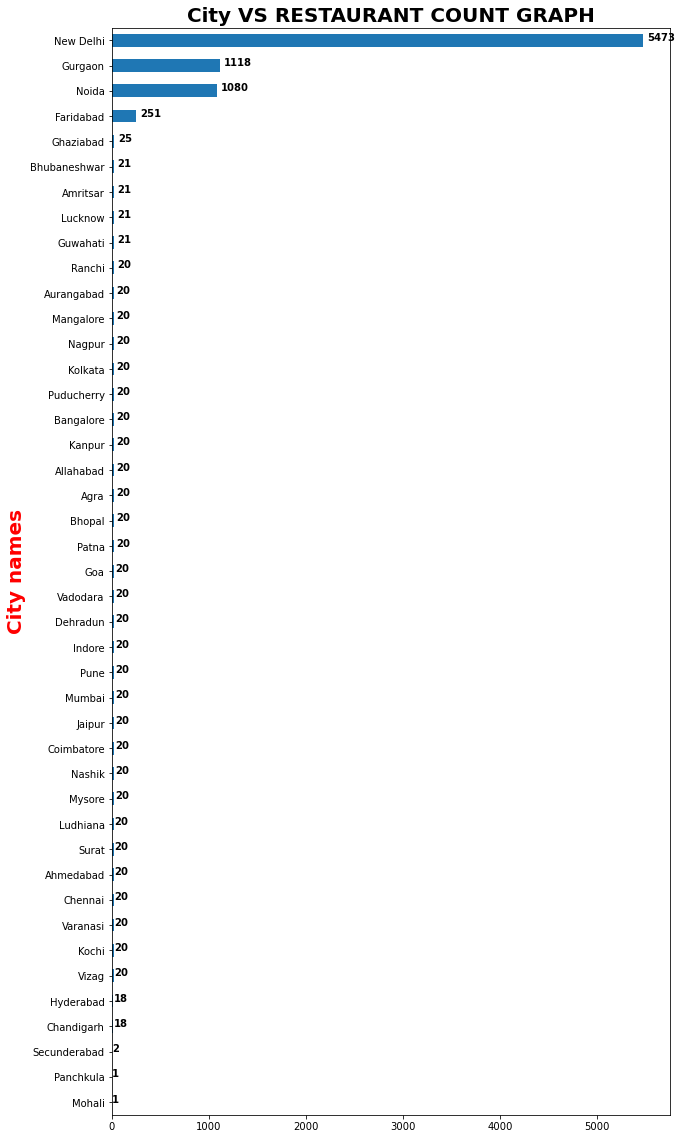

In [57]:
fig=plt.figure(figsize=(10,20))
City_Count.plot(kind="barh",fontsize=10)
plt.ylabel("City names",fontsize=20,color="red",fontweight='bold')
plt.title("City VS RESTAURANT COUNT GRAPH",fontsize=20,color="BLACK",fontweight='bold')
for v in range(len(City_Count)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+City_Count[v],v,City_Count[v],fontsize=10,color="BLACK",fontweight='bold')


**2.2 -  Restaurant franchise is a thriving venture. So, it becomes very
important to explore the franchise with most national presence.**

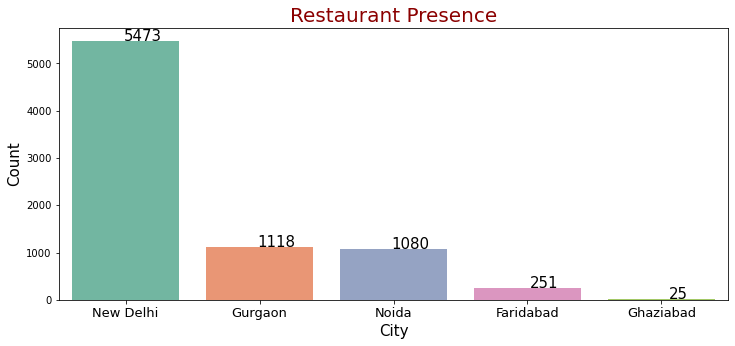

In [63]:
plt.figure(figsize = (12,5))
vc = df.City.value_counts()[:5]
g = sns.barplot(x = vc.index, y = vc.values, palette = 'Set2')
g.set_xticklabels(g.get_xticklabels(),fontsize = 13)
for i in range(5):
    value = vc[i]
    g.text(y = value - 2,x = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_ylabel('Count', fontsize = 15)
g.set_xlabel('City', fontsize=15)
g.set_title('Restaurant Presence', fontsize = 20, color = 'darkred')
plt.show()

It is already knew that India has the largest market in this data, on that New Delhi has the most number of restaurants followed by Gurgaon, Noida, Faridabad, Ghaziabad.
Remaining cities has less number of restaurants which are not noticable.

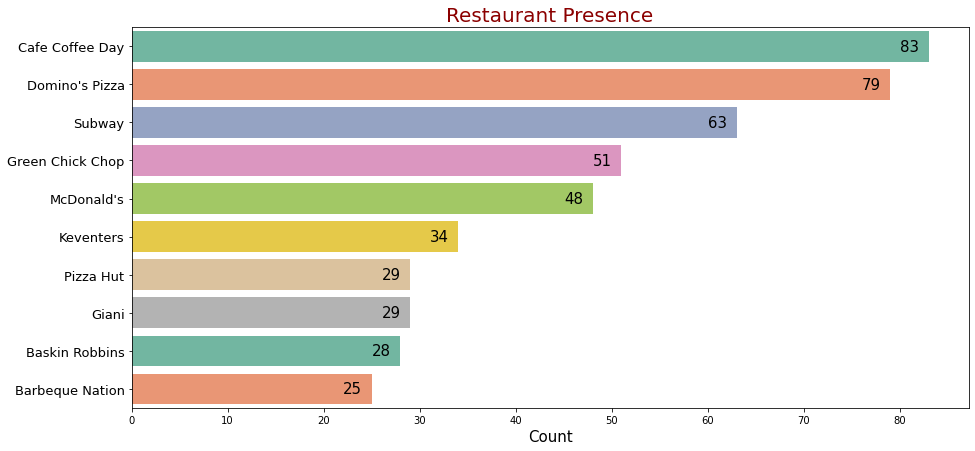

In [72]:
plt.figure(figsize = (15,7))
vc = df.Restaurant_Name.value_counts()[:10]
g = sns.barplot(y = vc.index, x = vc.values, palette = 'Set2')
g.set_yticklabels(g.get_yticklabels(),fontsize = 13)
for i in range(10):
    value = vc[i]
    g.text(x = value - 2,y = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_xlabel('Count', fontsize = 15)
g.set_title('Restaurant Presence', fontsize = 20, color = 'darkred')
plt.show()

**2.3 - Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking**

In [74]:
print("No. of restaurants with table booking facility:")
(df.Has_Table_booking== 'Yes').sum()

No. of restaurants with table booking facility:


1111

In [81]:
print("No. of restaurants which does not provide table booking facility:")
(df.Has_Table_booking== 'No').sum()

No. of restaurants which does not provide table booking facility:


7540

Text(0.5, 1.0, 'Restaurants providing Table booking facility:')

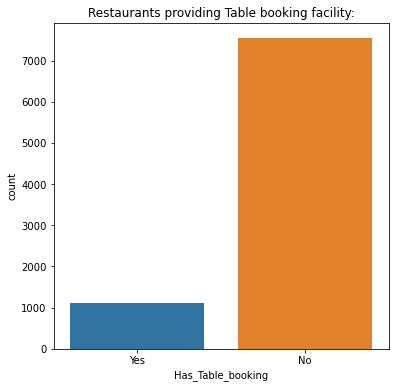

In [82]:
sns.countplot(x=df['Has_Table_booking'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants providing Table booking facility:')

**2.4 - Find out the percentage of restaurants providing online delivery**

In [83]:
print("No. of restaurants with online delivery:")
(df.Has_Online_delivery == 'Yes').sum()

No. of restaurants with online delivery:


2423

In [80]:
print("No. of restaurants which does not delivery online:")
(df.Has_Online_delivery == 'No').sum()

No. of restaurants which does not delivery online:


6228

Text(0.5, 1.0, 'Restaurants delivering online or Not')

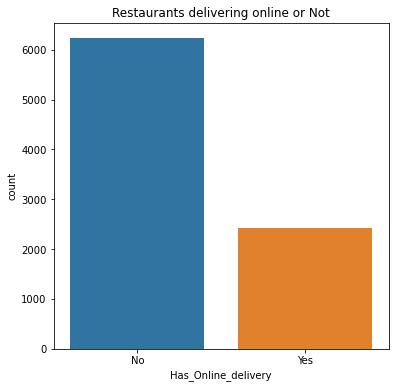

In [84]:
sns.countplot(x=df['Has_Online_delivery'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants delivering online or Not')

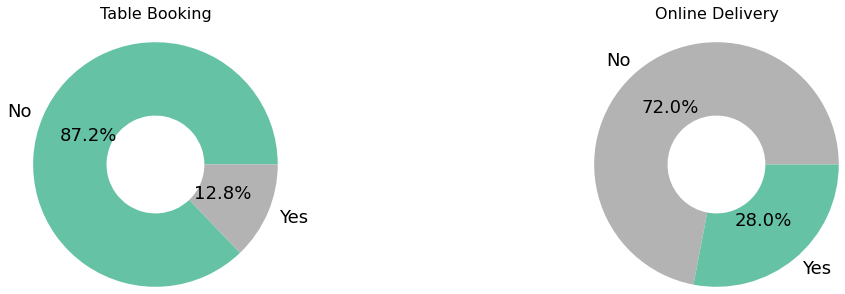

In [86]:
f,axes = plt.subplots(1,2,figsize = (15,5))
df.Has_Table_booking.value_counts().plot.pie(ax = axes[0],autopct = '%0.1f%%', radius = 1.25, wedgeprops = {'width' : 0.75}, cmap = 'Set2',
textprops = {'size' : 18,} )
#axes[0].set_xticklabels(labels = axes[0].get_xticklabels(),rotation = 0)
axes[0].set_title('Table Booking\n',fontsize = 16)
axes[0].set_ylabel('')
df.Has_Online_delivery.value_counts().plot.pie(ax = axes[1], autopct = '%0.1f%%', radius = 1.25,wedgeprops = {'width' : 0.75}, cmap = 'Set2_r',
textprops = {'size' : 18} )
axes[1].set_title('Online Delivery\n', fontsize = 16)
#axes[1].set_xticklabels(labels = axes[1].get_xticklabels(),rotation = 0)
axes[1].set_ylabel('')
plt.tight_layout(w_pad = 20, h_pad = 10, pad = 4)
plt.show()

In [87]:
pd.crosstab(df.Has_Online_delivery,df.Has_Table_booking)

Has_Table_booking,No,Yes
Has_Online_delivery,,
No,5544,684
Yes,1996,427


**2.5 - Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver**

In [107]:
Number_of_votes = df.groupby('Has_Online_delivery')['Votes'].sum()
Number_of_votes

Has_Online_delivery
No     679780
Yes    506614
Name: Votes, dtype: int64

In [109]:
print('number of votes for the restaurants that deliver and the restaurants that do not deliver :',Number_of_votes[0] - Number_of_votes[1])

number of votes for the restaurants that deliver and the restaurants that do not deliver : 173166


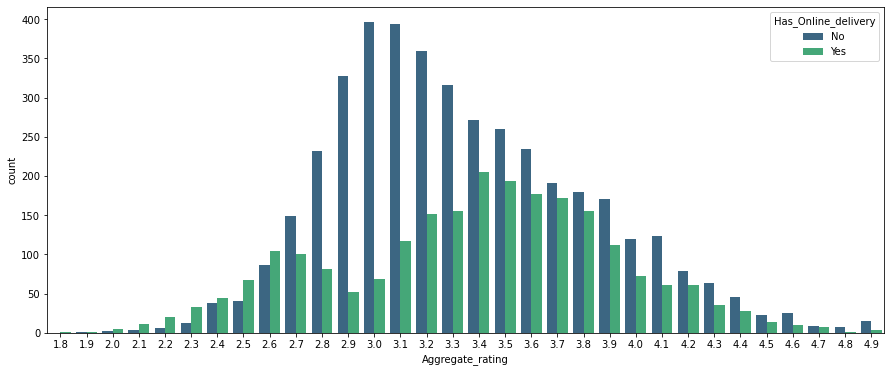

In [110]:
#difference of votes as per ratings.
plt.figure(figsize=(15,6))
sns.countplot(data=df[df.Aggregate_rating !=0],x='Aggregate_rating',hue='Has_Online_delivery',palette='viridis')
plt.show()

**2.6 - What are the top 10 cuisines served across cities?**

In [116]:
top10_City = df.City.value_counts()[:10]
top10_City

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Lucknow           21
Guwahati          21
Puducherry        20
Name: City, dtype: int64

In [118]:
l = []
for i in df.Cuisines.str.split(','):
    l.extend(i)
s = pd.Series([i.strip() for i in l])

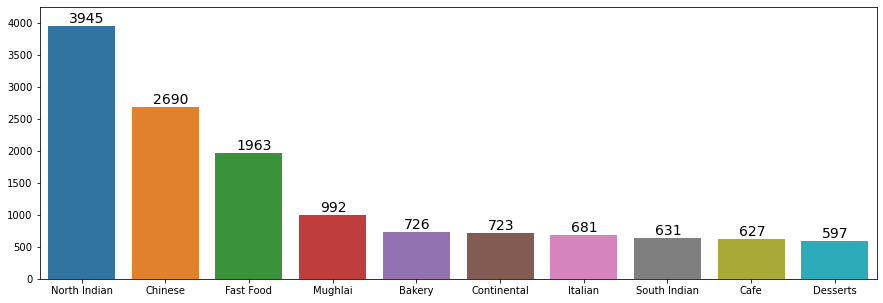

In [114]:
plt.figure(figsize = (15,5))
sns.barplot(x = s.value_counts()[:10].index, y = s.value_counts()[:10])
for i in range(10):
    plt.annotate(s.value_counts()[i], xy = (i-0.15,s.value_counts()[i]+50),fontsize = 14)
plt.ylim(0, round(s.value_counts()[0]+300))
plt.show()

**2.7 - What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?**

In [119]:
df['number_of_cuisines'] = df.Cuisines.str.split(',').apply(len)

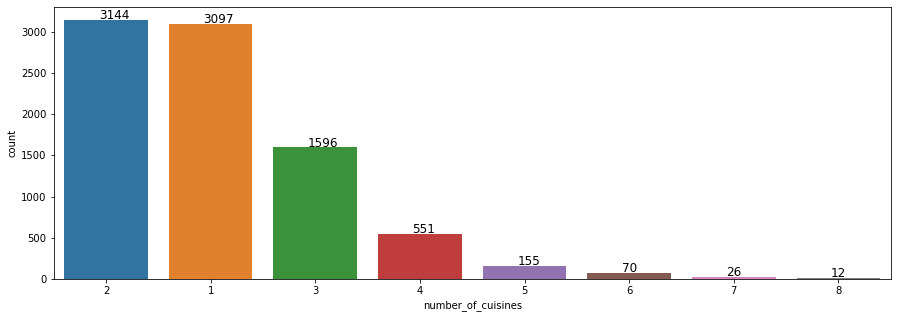

In [123]:
plt.figure(figsize = (15,5))
vc = df.number_of_cuisines.value_counts()
sns.countplot('number_of_cuisines', data=df, order = vc.index)
for i in range(len(vc)):
    plt.annotate(vc.iloc[i], xy = (i-0.07,vc.iloc[i]+10), fontsize = 12)
plt.show()

**2.8 - What is the distribution cost across the restaurants?**

C:\Users\Keerthiraj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


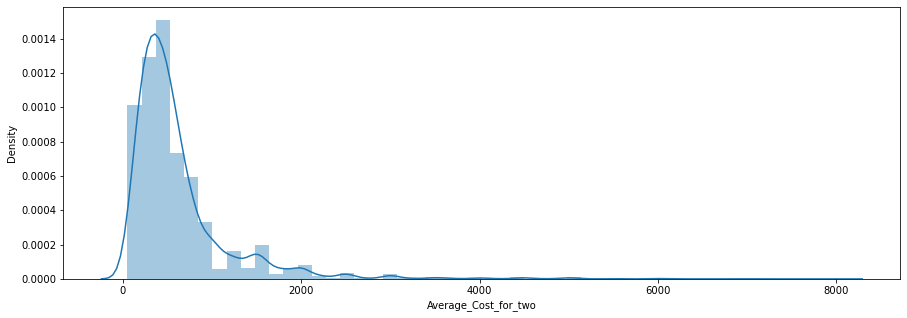

In [135]:
plt.figure(figsize = (15,5))
sns.distplot(df[df.Average_Cost_for_two != 0].Average_Cost_for_two)
plt.show()

**2.9 - How ratings are distributed among the various factors?**

In [150]:
df['Rating_cat'] = df['Aggregate_rating'].round(0).astype(int)

<ipython-input-151-15a355c76f2b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticks(),fontsize = 12)


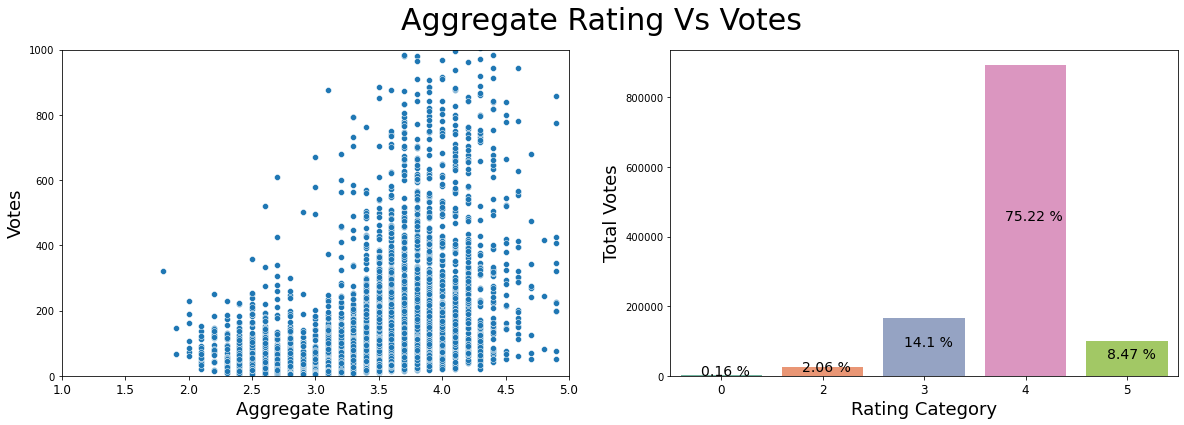

In [151]:
f,ax = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(data=df,x='Aggregate_rating',y='Votes', ax = ax[0], palette ='Set2')
agg = df.pivot_table(index = 'Rating_cat', values = 'Votes', aggfunc = 'sum').reset_index()
agg['Perc_votes']= (agg.Votes/agg.Votes.sum()*100).round(2)
sns.barplot(x = 'Rating_cat', y = 'Votes', data = agg, ax = ax[1], palette='Set2')
for i in range(len(agg)):
    ax[1].annotate(str(agg.Perc_votes[i])+' %', xy = (i-0.2,int(agg.Votes[i]/2)), fontsize = 14, fontweight = 'medium')
ax[0].set_ylim(0,1000)
ax[0].set_xlim(1,5)
ax[0].set_ylabel('Votes',fontsize = 18 )
ax[0].set_xlabel('Aggregate Rating',fontsize = 18 )
ax[0].set_xticklabels(ax[0].get_xticks(),fontsize = 12)
ax[1].set_ylabel('Total Votes',fontsize = 18 )
ax[1].set_xlabel('Rating Category',fontsize = 18 )
ax[1].set_xticklabels(agg.Rating_cat,fontsize = 12)
plt.suptitle('Aggregate Rating Vs Votes', size = 30)
plt.show()

C:\Users\Keerthiraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


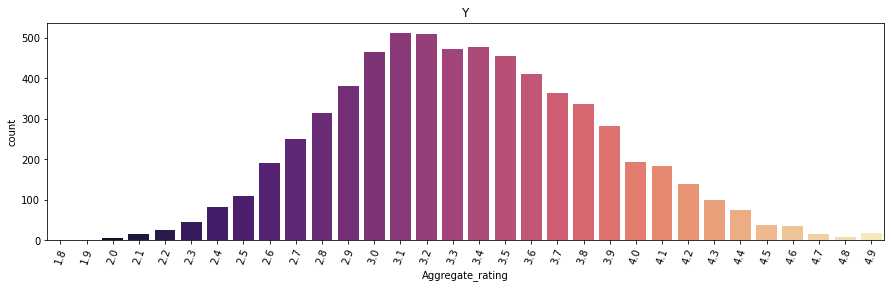

In [153]:
plt.figure( figsize = (15, 4))
sns.countplot('Aggregate_rating', data = df[df.Aggregate_rating !=0] , palette = 'magma')
plt.tick_params('x', rotation = 70)
plt.title('Y')
plt.show()

In [154]:
df["Rating_color"].value_counts()
Color_represents = df.groupby(['Rating_color'],as_index =False)['Aggregate_rating'].mean()

In [155]:
Color_represents.columns = ['Rating_color','Average_rating']

In [156]:
Color_represents =Color_represents.sort_values(by='Average_rating',ascending=False)

In [157]:
Color_represents = Color_represents[0:5]
Color_represents['Ratings'] = ['Excellent','Very Good','Good','Okay','Poor']

In [158]:
Color_represents

,Rating_color,Average_rating,Ratings
0,Dark Green,4.646552,Excellent
1,Green,4.153401,Very Good
5,Yellow,3.677423,Good
2,Orange,3.048722,Okay
3,Red,2.296111,Poor


**2.10 - Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.**

In [138]:
df['Average_Cost_for_two_cat']= pd.cut(df[df.Average_Cost_for_two != 0].Average_Cost_for_two,
bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000],
labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'nolimit'])

C:\Users\Keerthiraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


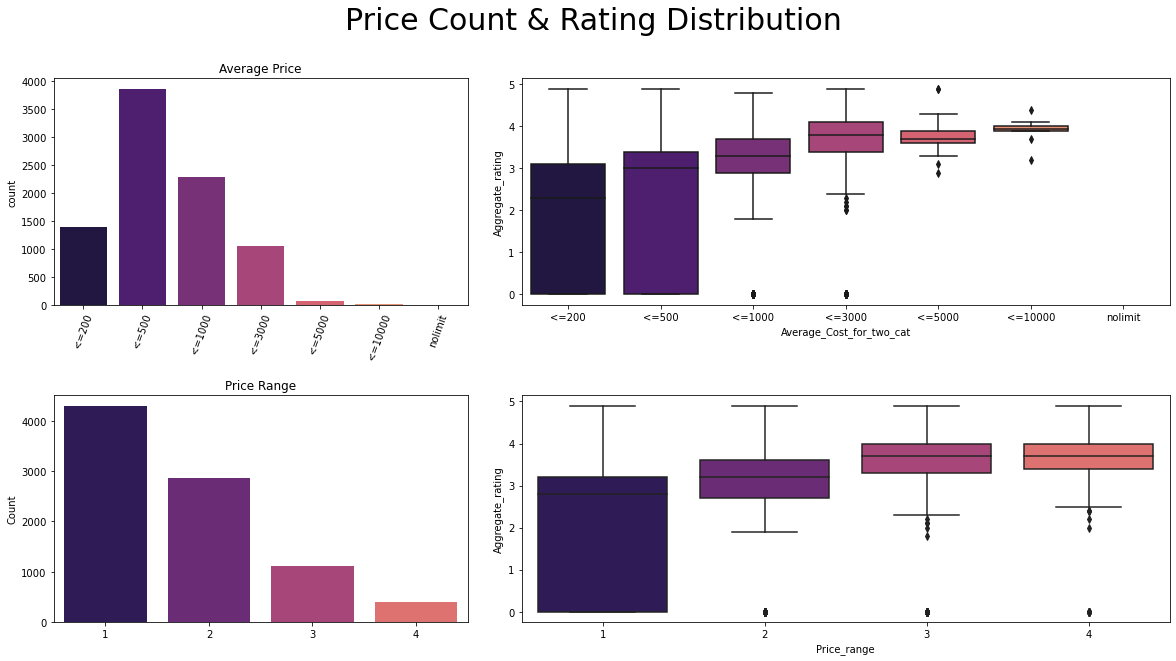

In [145]:
f = plt.figure(figsize = (20,10))
ax = plt.subplot2grid((2,5), (0,0),colspan = 2)
sns.countplot(df['Average_Cost_for_two_cat'], ax = ax, palette = sns.color_palette('magma', 7))
ax.set_title('Average Price')
ax.set_xlabel('')
ax.tick_params('x', rotation = 70)
ax = plt.subplot2grid((2,5), (0,2), colspan = 3)
sns.boxplot(x = 'Average_Cost_for_two_cat', y = 'Aggregate_rating', data =df, ax = ax, palette = sns.color_palette('magma', 7))
count = df['Price_range'].value_counts().reset_index()
count.columns = ['Price_range', 'Count']
ax = plt.subplot2grid((2,5), (1,0),colspan = 2)
sns.barplot(x = 'Price_range', y = 'Count', data = count, ax=ax, palette = sns.color_palette('magma', 5))
ax.set_title('Price Range')
ax.set_xlabel('')
ax = plt.subplot2grid((2,5), (1,2), colspan = 3)
sns.boxplot(x='Price_range', y ='Aggregate_rating', data = df, ax = ax, palette = sns.color_palette('magma', 5))
plt.subplots_adjust(wspace = 0.3, hspace = 0.4,)
plt.suptitle('Price Count & Rating Distribution', size = 30)
plt.show()